# 도전과제 : openweathermap API를 활용해 서울의 날씨 예보 출력 및 시각화


## API Key 발급 방법
1. https://openweathermap.org/ 에 접속해 회원가입을 합니다.
2. 로그인 후 우상단 계정 정보에서 'My API Keys' 클릭(https://home.openweathermap.org/api_keys)
3. 'Create Key'에서 이름 입력 후 'Generate' 클릭
4. 다시 링크를 새로고침하면 Key가 발급되었음을 확인할 수 있습니다.

* 참고 : https://openweathermap.org/api/one-call-3
* 참고 : 회원가입을 하지 않고 무료 버전 API Subscribe가 가능하긴 한데, 이 경우 결제과정(과금은 안됨)이 추가되니 회원가입을 적극 권장



## 과제 요구사항

1. API를 호출하여 서울의 날씨 예보를 보여주고 시각화까지 진행해주세요.
2. '섭씨 온도, 습도, 풍속' 데이터는 반드시 포함되어야 합니다.
3. 출력 결과는 예시와 비슷해야 하며, 본인의 API Key는 지우고 제출하시면 됩니다.

* 참고 : 무료 API 플랜의 경우 분 당 60 calls, 5일 간의 3시간 단위 예보를 제공합니다.

In [ ]:
import requests

In [ ]:
my_api_key = ''
city_name = "Seoul"

In [ ]:
res = requests.get('https://api.openweathermap.org/data/2.5/forecast?q=Seoul&appid=e7af432b9ed037586be586f3c50044f7&units=metric')
result = res.json()

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd


def get_weather_forecast(api_key, city_name):
    base_url = "http://api.openweathermap.org/data/2.5/forecast"
    params = {
        "q": city_name,        # 검색할 도시 이름
        "appid": api_key,      # API 액세스 키
        "units": "metric"      # 온도를 섭씨로 받기 위해 metric 사용
    }

    response = requests.get(base_url, params=params)
    result = response.json()

    if response.status_code == 200:
      return result['list']

In [ ]:
results = get_weather_forecast(my_api_key, city_name)

df_combined = pd.DataFrame()

if results is not None :
  for i in range(len(results)) :
    weather_info = results[i]
    time = weather_info['dt_txt']
    temp = weather_info['main']['temp']
    humid = weather_info['main']['humidity']
    wind_speed = weather_info['wind']['speed']
    weather = weather_info['weather'][0]['main']
    appedn_dict = {'Time' : time, 'Temperature' : temp, 'Humidity' : humid, 'Wind Speed' : wind_speed, 'Weather' : weather}
    df= pd.DataFrame([appedn_dict])
    df['Time'] = pd.to_datetime(df['Time'])
    df_combined = pd.concat([df_combined,df], ignore_index=True)

df_combined

,Time,Temperature,Humidity,Wind Speed,Weather
0,2024-01-17 09:00:00,0.00,98,1.17,Snow
1,2024-01-17 12:00:00,0.29,98,1.59,Rain
2,2024-01-17 15:00:00,0.65,99,1.53,Rain
3,2024-01-17 18:00:00,0.73,99,1.17,Rain
4,2024-01-17 21:00:00,0.73,99,1.01,Clouds
5,2024-01-18 00:00:00,0.81,98,0.87,Clouds
6,2024-01-18 03:00:00,3.03,90,1.35,Clouds
7,2024-01-18 06:00:00,4.37,86,1.46,Clouds
8,2024-01-18 09:00:00,3.20,92,1.51,Clouds
9,2024-01-18 12:00:00,3.06,87,1.83,Clouds


In [ ]:
results = get_weather_forecast(my_api_key, city_name)

if results is not None :
  for i in range(len(results)-1) :
    weather_info = results[i]
    next_time = results[i+1]['dt_txt']
    time = weather_info['dt_txt']
    temp = weather_info['main']['temp']
    humid = weather_info['main']['humidity']
    wind_speed = weather_info['wind']['speed']
    weather = weather_info['weather'][0]['main']

    print(f'{time} to {next_time} : weather is {weather}, temperature : {temp}°C, humidity : {humid}%, wind speed : {wind_speed}m/s')

2024-01-17 09:00:00 to 2024-01-17 12:00:00 : weather is Snow, temperature : 0°C, humidity : 98%, wind speed : 1.17m/s
2024-01-17 12:00:00 to 2024-01-17 15:00:00 : weather is Rain, temperature : 0.29°C, humidity : 98%, wind speed : 1.59m/s
2024-01-17 15:00:00 to 2024-01-17 18:00:00 : weather is Rain, temperature : 0.65°C, humidity : 99%, wind speed : 1.53m/s
2024-01-17 18:00:00 to 2024-01-17 21:00:00 : weather is Rain, temperature : 0.73°C, humidity : 99%, wind speed : 1.17m/s
2024-01-17 21:00:00 to 2024-01-18 00:00:00 : weather is Clouds, temperature : 0.73°C, humidity : 99%, wind speed : 1.01m/s
2024-01-18 00:00:00 to 2024-01-18 03:00:00 : weather is Clouds, temperature : 0.81°C, humidity : 98%, wind speed : 0.87m/s
2024-01-18 03:00:00 to 2024-01-18 06:00:00 : weather is Clouds, temperature : 3.03°C, humidity : 90%, wind speed : 1.35m/s
2024-01-18 06:00:00 to 2024-01-18 09:00:00 : weather is Clouds, temperature : 4.37°C, humidity : 86%, wind speed : 1.46m/s
2024-01-18 09:00:00 to 2024

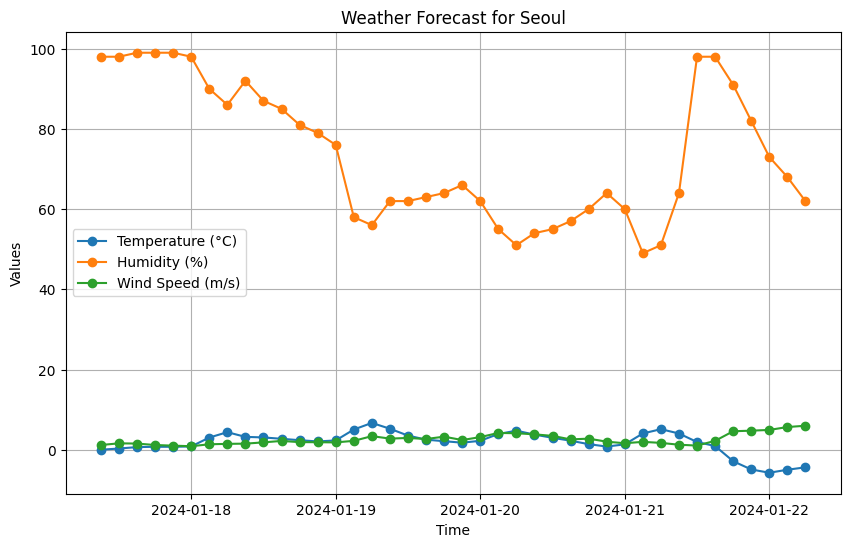

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_combined['Time'], df_combined['Temperature'], label='Temperature (°C)', marker='o')
plt.plot(df_combined['Time'], df_combined['Humidity'], label='Humidity (%)', marker='o')
plt.plot(df_combined['Time'], df_combined['Wind Speed'], label='Wind Speed (m/s)', marker='o')

plt.title('Weather Forecast for Seoul')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True);